<a href="https://colab.research.google.com/github/JanNogga/Vision_Systems_Lab/blob/main/Assignment_5/Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assigment 05

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torchvision import datasets, transforms

from utils import reject_randomness

In [2]:
# try to make the code deterministic
reject_randomness(2021)

### Datasets

Here we load the MNIST and Fashion-MNIST datasets along with the corresponding training and validation dataloaders.

In [3]:
# Load MNIST
trainset_MNIST = datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(),download=True)
testset_MNIST = datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor())
# Create dataloaders
BATCH_SIZE_MNIST = 1024
train_loader_MNIST = torch.utils.data.DataLoader(dataset=trainset_MNIST, batch_size=BATCH_SIZE_MNIST, shuffle=True) 
test_loader_MNIST = torch.utils.data.DataLoader(dataset=testset_MNIST, batch_size=BATCH_SIZE_MNIST, shuffle=False)

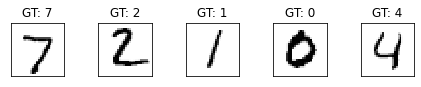

In [4]:
# Show some images from the test set
images_MNIST, labels_MNIST = next(iter(test_loader_MNIST))
plt.figure()
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.tight_layout()
    plt.imshow(images_MNIST[i][0], cmap='Greys', interpolation='none')
    plt.title(f'GT: {labels_MNIST[i]}')
    plt.xticks([])
    plt.yticks([])
plt.show()

In [5]:
# Load Fashion-MNIST
trainset_FashionMNIST = datasets.FashionMNIST(root='./data', train=True, transform=transforms.ToTensor(),download=True)
testset_FashionMNIST = datasets.FashionMNIST(root='./data', train=False, transform=transforms.ToTensor())
# Create dataloaders
BATCH_SIZE_FashionMNIST = 1024
train_loader_FashionMNIST = torch.utils.data.DataLoader(dataset=trainset_FashionMNIST, batch_size=BATCH_SIZE_FashionMNIST, shuffle=True) 
test_loader_FashionMNIST = torch.utils.data.DataLoader(dataset=testset_FashionMNIST, batch_size=BATCH_SIZE_FashionMNIST, shuffle=False)

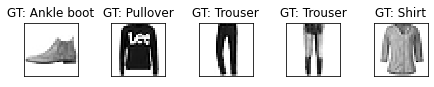

In [6]:
# Also show some images from the test set
classes = testset_FashionMNIST.classes
images_FashionMNIST, labels_FashionMNIST = next(iter(test_loader_FashionMNIST))
plt.figure()
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.tight_layout()
    plt.imshow(images_FashionMNIST[i][0], cmap='Greys', interpolation='none')
    plt.title(f'GT: {classes[labels_FashionMNIST[i]]}')
    plt.xticks([])
    plt.yticks([])
plt.show()

### Training

Since we want to track accuracy on the validation data, we create the corresponding criterion here. For training, we use *nn.CrosstEntropyLoss()*.

In [7]:
class Accuracy(nn.Module):
    def __init__(self):
        super(Accuracy, self).__init__()
    def forward(self, x, target):
        return (x.argmax(dim=-1) == target).float().mean() * 100

eval_metrics = {
  "accuracy": Accuracy()
}

criterion = nn.CrossEntropyLoss()

Now we can import our trainer and the classifer models for the following tasks. The model are described in more detail in *models.py*.

In [8]:
from trainer import Trainer
from utils import plot_history
from models import customLSTMClassifier, customGRUClassifier, LSTMClassifier, nojit_customLSTMClassifier

### Experiment 1 a) - Classifier using nn.LSTM() on MNIST

This just serves as a baseline for our models.

  0%|          | 0/250 [00:00<?, ?it/s]

Early stopping triggered!


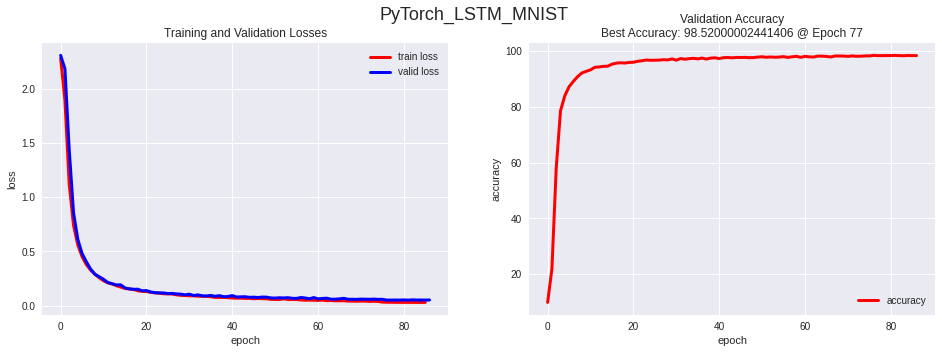

In [20]:
model = LSTMClassifier(input_dim=28, embed_dim=64, hidden_dim=32, num_layers=3)

title = 'PyTorch_LSTM_MNIST'
pytorch_lstm_mnist_trainer = Trainer(model, criterion, train_loader_MNIST, test_loader_MNIST, eval_metrics, es_mode='max', description=title)
pytorch_lstm_mnist_trainer.fit() # Training at about 5.2s per iteration

# visualize training process
plot_history(pytorch_lstm_mnist_trainer)

### Experiment 1 b) - Classifier using our LSTM on MNIST

The model hyperparameters are as close to the previous experiment as possible.

  0%|          | 0/250 [00:00<?, ?it/s]

Early stopping triggered!


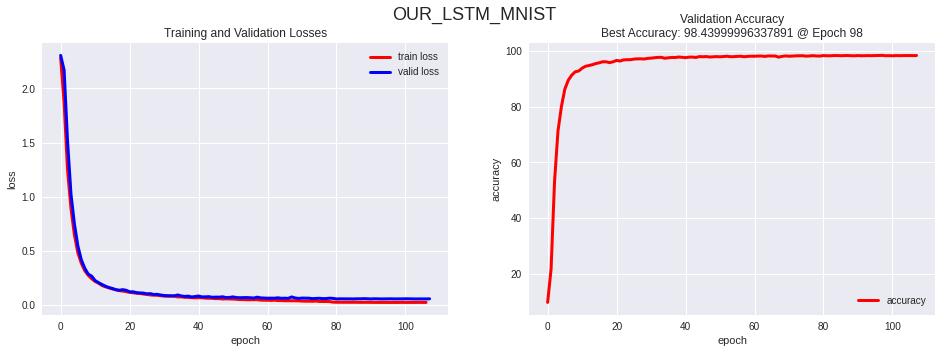

In [21]:
model = customLSTMClassifier(input_dim=28, embed_dim=64, hidden_dim=32, num_layers=3)

title = 'OUR_LSTM_MNIST'
our_lstm_mnist_trainer = Trainer(model, criterion, train_loader_MNIST, test_loader_MNIST, eval_metrics, es_mode='max', description=title)
our_lstm_mnist_trainer.fit() # Training at about 9.7s per iteration

# visualize training process
plot_history(our_lstm_mnist_trainer)

### Experiment 1 c) - Classifier using our GRU on MNIST

Again, the model hyperparameters are as close to the previous experiment as possible.

  0%|          | 0/250 [00:00<?, ?it/s]

Early stopping triggered!


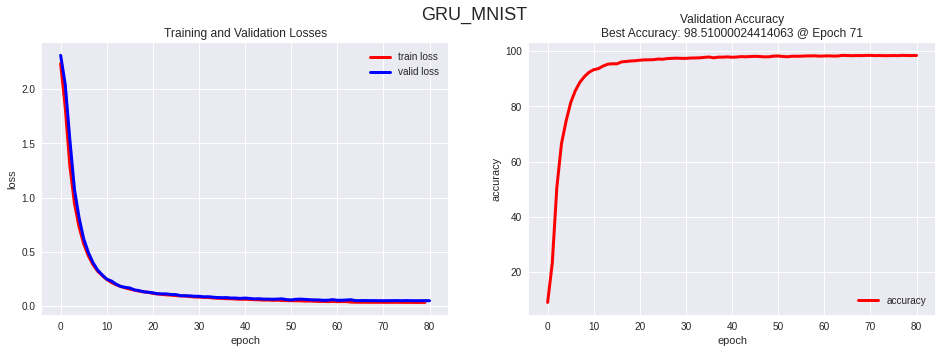

In [22]:
model = customGRUClassifier(input_dim=28, embed_dim=64, hidden_dim=32, num_layers=3)

title = 'GRU_MNIST'
gru_mnist_trainer = Trainer(model, criterion, train_loader_MNIST, test_loader_MNIST, eval_metrics, es_mode='max', description=title)
gru_mnist_trainer.fit() # Training at about 8.2s per iteration

# visualize training process
plot_history(gru_mnist_trainer)

### Experiment 2 a) - Classifier using nn.LSTM() on Fashion-MNIST

This is a baseline as required by the task

  0%|          | 0/250 [00:00<?, ?it/s]

Early stopping triggered!


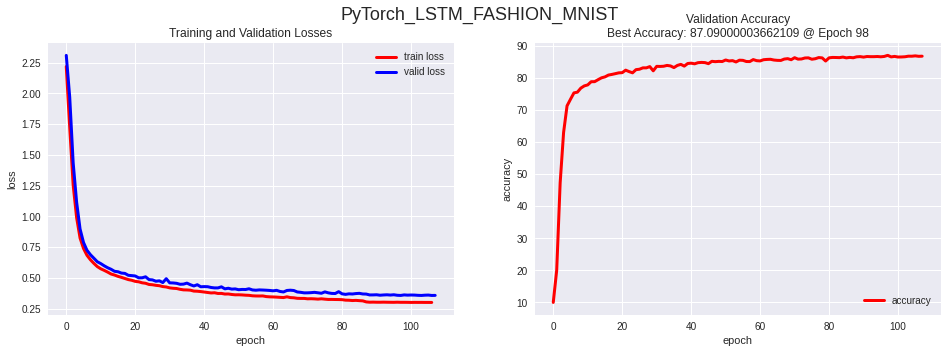

In [23]:
model = LSTMClassifier(input_dim=28, embed_dim=64, hidden_dim=32, num_layers=3)

title = 'PyTorch_LSTM_FASHION_MNIST'
pytorch_lstm_fmnist_trainer = Trainer(model, criterion, train_loader_FashionMNIST, test_loader_FashionMNIST, eval_metrics, es_mode='max', description=title)
pytorch_lstm_fmnist_trainer.fit() # Training at about 5.3s per iteration

# visualize training process
plot_history(pytorch_lstm_fmnist_trainer)

### Experiment 2 b) - Classifier using our LSTM on Fashion-MNIST

Like above, the hyperparameters are as close as possible.

  0%|          | 0/250 [00:00<?, ?it/s]

Early stopping triggered!


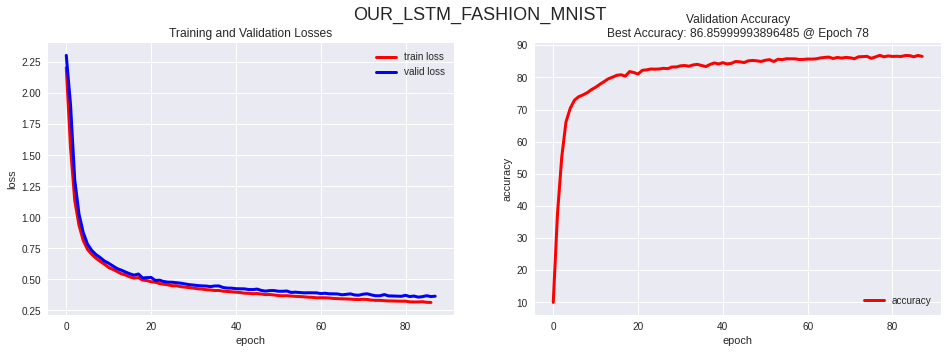

In [24]:
model = customLSTMClassifier(input_dim=28, embed_dim=64, hidden_dim=32, num_layers=3)

title = 'OUR_LSTM_FASHION_MNIST'
our_lstm_fmnist_trainer = Trainer(model, criterion, train_loader_FashionMNIST, test_loader_FashionMNIST, eval_metrics, es_mode='max', description=title)
our_lstm_fmnist_trainer.fit() # Training at about 9.6s per iteration

# visualize training process
plot_history(our_lstm_fmnist_trainer)

### Experiment 2 c) - Classifier using our GRU on Fashion-MNIST

Just out of interest, the parameters are again selected to be similar.

  0%|          | 0/250 [00:00<?, ?it/s]

Early stopping triggered!


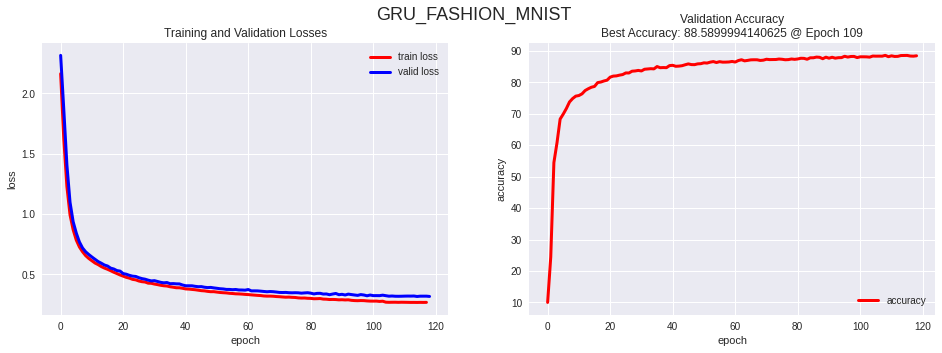

In [25]:
model = customGRUClassifier(input_dim=28, embed_dim=64, hidden_dim=32, num_layers=3)

title = 'GRU_FASHION_MNIST'
gru_fmnist_trainer = Trainer(model, criterion, train_loader_FashionMNIST, test_loader_FashionMNIST, eval_metrics, es_mode='max', description=title)
gru_fmnist_trainer.fit() # Training at about 8.2s per iteration

# visualize training process
plot_history(gru_fmnist_trainer)

### Summary

#### Validation Accuracy on the Datasets

|Model     |MNIST     |Fashion-MNIST|
|----------|----------|-------------|
|nn.LSTM   |**0.9852**|0.8709       |
|LSTM      |0.9844    |0.8686       |
|GRU       |0.9851    |**0.8859**   |
|LSTM noJIT|0.9830    |0.8734       |


#### Seconds per Epoch on the Datasets

|Model     |MNIST   |Fashion-MNIST|
|----------|--------|-------------|
|nn.LSTM   |**5.2s**|**5.3s**     |
|LSTM      |9.7s    |9.6s         |
|GRU       |8.2s    |8.2s         |
|LSTM noJIT|11.3s   |11.3s        |

### Conclusion

Despite using *jit.ScriptModule* to minimize effects of the bad performance of the python interpreter when computing the RNN loop over the sequence length $C \times H$, the LSTM from *torch.nn* runs almost twice as fast as our own model. Maybe there is some fancy cuDNN optimization in *nn.LSTM*, anyhow we could not match the speed of this model, even though the number of operations should be very similar. Our GRU is slightly faster than our LSTM, this is expected because it is more simple. In the following cells, we also train on both datasets using our LSTM without any torchscript components. The results suggest that models using torchscript are around $14 \%$ faster in this case.

The test set accuracy is surprisingly high, and extremely similar, for all three models on MNIST. Here, each training run ends up with a trained model that achieves around $98.5 \%$ accuracy on the validation set.

Fashion-MNIST is clearly the more difficult dataset, as the accuracy of all models is lower here, and a tendency to overfit is evident in the training graphs. However, the GRU does best here, reaching close to $88.6 \%$ accuracy, while the LSTMs peak at around $87 \%$. Maybe this occurs because it has fewer parameters and thus has to rely on more robust generalization. At the very least, the significant lead of more than $1.5 \%$ over the LSTM models are a strong indicator the GRU has an advantage attempting to solve the problem of row-wise image classification.

#### Addendum

To complete the values above in terms of checking whether torch jit actually improved performance, we train on both datasets again without using jit.

In [11]:
# Do this again because this part was added later
reject_randomness(2021)

  0%|          | 0/250 [00:00<?, ?it/s]

Early stopping triggered!


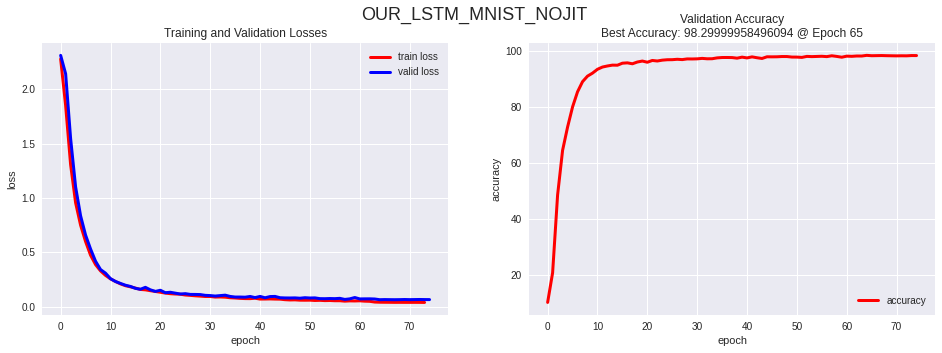

In [9]:
model = nojit_customLSTMClassifier(input_dim=28, embed_dim=64, hidden_dim=32, num_layers=3)

title = 'OUR_LSTM_MNIST_NOJIT'
nojit_lstm_mnist_trainer = Trainer(model, criterion, train_loader_MNIST, test_loader_MNIST, eval_metrics, es_mode='max', description=title)
nojit_lstm_mnist_trainer.fit() # Training at about 11.3s per iteration

# visualize training process
plot_history(nojit_lstm_mnist_trainer)

  0%|          | 0/250 [00:00<?, ?it/s]

Early stopping triggered!


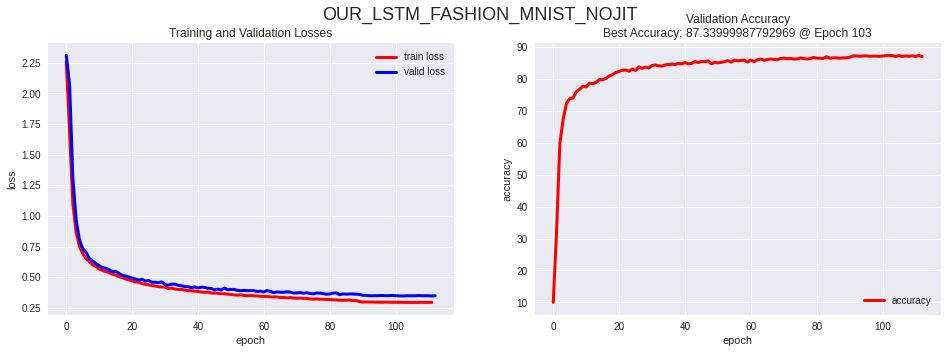

In [10]:
model = nojit_customLSTMClassifier(input_dim=28, embed_dim=64, hidden_dim=32, num_layers=3)

title = 'OUR_LSTM_FASHION_MNIST_NOJIT'
nojit_lstm_fmnist_trainer = Trainer(model, criterion, train_loader_FashionMNIST, test_loader_FashionMNIST, eval_metrics, es_mode='max', description=title)
nojit_lstm_fmnist_trainer.fit() # Training at about 11.3s per iteration

# visualize training process
plot_history(nojit_lstm_fmnist_trainer)